<a href="https://colab.research.google.com/github/RiverTwilight/Deep_Learning_Full_Example/blob/master/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

This is a full example of how to detect hand-writting number with deep learning. The example is based on the MNIST dataset, which contains 60,000 training images and 10,000 testing images. Each image is a 28x28 grayscale image of a hand-written digit. The goal is to train a model to correctly classify the digit in the image.

## Dataset

This will transform the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).

In [13]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import numpy as np
import sys, os
sys.path.append('/content/')

url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

# dataset_dir = os.path.dirname(os.path.abspath("/content"))
dataset_dir = "/content"
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """读入MNIST数据集
    
    Parameters
    ----------
    normalize : 将图像的像素值正规化为0.0~1.0
    one_hot_label : 
        one_hot_label为True的情况下，标签作为one-hot数组返回
        one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组
    flatten : 是否将图像展开为一维数组
    
    Returns
    -------
    (训练图像, 训练标签), (测试图像, 测试标签)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


# Functions



## Basic Funtions

[1 1 0]
[11  9]
[13  8]


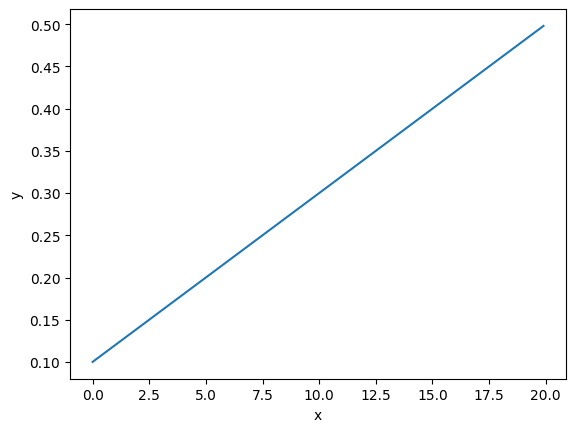

In [14]:
# Activation Function
import matplotlib.pyplot as plt

def step(x):
    y = x > 0
    return y.astype(int)

print(step(np.array([1, 3, 0])))

# Old and widely-used activation function.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# There are three common places of these three activation function:
#
#  1. The output is between 0 to 1
#  2. Both is liner function
#  3. The more important the input is, the bigger the output is.

x = np.array([1, 2])
w = np.array([[3, 4], [5, 2]]) # The row number should equal to x's length.

# Diffrent operation order will output diffrenet result
print(np.dot(w, x)) # [11, 9]
print(np.dot(x, w)) # [13, 8] [1 x 3 + 2 x 5, 1 x 4 + 2 x 4]

# Central Difference Derivation
# We use 2 h to reduce the deviation.
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

def func_1(x):
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = numerical_diff(func_1, x) # This is a valid operation (boardcast)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
# plt.show()

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # e ^ (a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

def softmax_batch(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

## Cross Entropy Error

We want the loss function result as small as possible.

We introduce loss function to find a params that generate small loss function result.

In [15]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
    
def cross_entropy_error_batch(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    # Only output the index of the right anwser.
    if t.size == y.size:
        t = t.argmax(axis=1) # 1 is the max
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


# Graident

In vector calculus, the gradient of a scalar-valued differentiable function 
$ f $ of several variables is the vector field (or vector-valued function) f whose value at a point is the "direction and rate of fastest increase".

The most basic way to find the gradient is to use the numerical differentiation method.

$$  grad(x, y) = \frac{f(x + h) - f(x - h)}{2h} $$

```python
import numpy as np

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        it.iternext()   

def test_function(x):
    return x[0] ** 2 + x[1] ** 2

def gradient_desent(f, init_x, lr=0.01, step_num=100):
    """
    lr is Learning Rate. This should not be too large or too small.
    """

    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x
```

There are four mainstream gradient desend algorithum.

## SGD (Stochastic Gradient Descent)

We can get new weights by:

$$ W \leftarrow W - \eta \frac{\delta L}{\delta W} $$

$ \eta $ is the learning rate, and $ \frac{\delta L}{\delta W} $ is the gradinent of $ W $

The SGD sucks when the function is not anisotropic.


In [16]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key, val in params.items():
            params[key] -= self.lr * grads[key]

## Momentum

This method can make the gradient reach the extreme position faster

In [17]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]


## AdaGrad

The AdaGrad (Adaptive Gradient) introduces the **learning rate decay** method. Compared with the momentum method, this method will gradually reduce the learning rate.

## Adam

# Layers

## Relu

Return x if x is larger than 0, otherwise return 0.

$$
Relu(x) = \left\{
    \begin{array}\\
        1 & \mbox{if } \ x > 0 \\
        0 & \mbox{otherwise }
    \end{array}
\right.
$$

In [18]:
class Relu:
    def __init__(self) -> None:
        self.mask = None
    
    def forward(self, x):
        """
        x should be a numpy array here
        """
        self.mask = (x <= 0) # An array represting wheather each element is larger than 0. [True, False, False]
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        """
        Set all the `Ture` in mask to 0
        """
        dout[self.mask] = 0
        dx = dout

        return dx

## Affine

$$
Affine(x) = X • W + b
$$

In [19]:
class Affine:
    def __init__(self, W, b) -> None:
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        x = x.reshape(x.shape[0], -1)
        dot = np.dot(self.x, self.W)
        out = dot + self.b # Boardcasting...

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx

## SoftmaxWithLoss

The Softmax Loss is a widely used loss function in the field of deep learning. It is also referred to as the Cross-entropy loss with softmax.

Let us consider the training data, denoted as 't', which is assumed to have undergone one-shot training, represented as follows:

 $$ t = (0, 0, 0, ..., 1, 0) $$

Here, $ t_{k} $ corresponds to the correct answer. The predicted result, denoted by $ z $, can be expressed as:

 $$ z = (z_{1}, z_{2}, ..., z_{C}) $$

The corresponding loss function, 'lz', can be formulated as:

 $$ l_{z} = \sum_{i=1}^{C} t_{i} log(z) = -log(z_{k})$$

In comparison to a linear function, the logarithmic function better represents our desired objective.

In [20]:
class SoftmaxWithLoss:
    def __init__(self, print_result=False) -> None:
        self.loss = None
        self.print_result = print_result
        self.y = None
        self.x = None

    def forward(self, x, t):
        self.t = t 
        # Teaching Data. Marking the right answer.
        # Set right anwser to 1 and wrongs to 0. For exmaple, [0, 0, 0, 1, 0, 0]

        self.y = softmax_batch(x)
        self.loss = cross_entropy_error_batch(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 监督数据是one-hot-vector的情况
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

## Batch Normalization


# Network


## Two Layer Net

This network reach a accuarcy of 97%

In [21]:
import numpy as np
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01, initParams=None) -> None:
        
        self.params = {}

        if initParams:
            self.params = initParams
        else:
            # Select {hidden_size} numbers from 0 - 0.01 * input_size
            self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
            self.params["b1"] = np.zeros(hidden_size)
            self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
            self.params["b2"] = np.zeros(output_size)

        self.layers = OrderedDict() # Remember the order of the addition
        self.layers['Affine1'] = Affine(self.params["W1"], self.params["b1"])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params["W2"], self.params["b2"])

        self.lastLayer = SoftmaxWithLoss(print_result = (not initParams == None))

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x

    def loss(self, x, t):
        y = self.predict(x)

        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        
        # Get the index of the maximum value. If one-shot is enabled the max value is 1
        # For example, [[1, 0, 0], [0,0,1]] will be converted to [0, 2]
        if t.ndim != 1: t = np.argmax(t, axis=1)

        if x.shape[0] <= 5:
            print("Expected Anwser: " + str(t))
            print("Exact Anwser: " + str(y))

        accuracy = np.sum(y == t) / float(x.shape[0])

        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        self.loss(x, t)

        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads["W1"] = self.layers["Affine1"].dW
        grads["b1"] = self.layers["Affine1"].db
        grads["W2"] = self.layers["Affine2"].dW
        grads["b2"] = self.layers["Affine2"].db

        return grads

## CNN

A enhanced version. One of the most significant diffrences is that CNN will not lose the data's shape. In the previos network we need to convert the two-dimension array to One-dimension. CNN allows us to directly input the original shaped data.

This overperfom other network especially when processing the colored image.

In [22]:
# TODO

# Training

## Two Layer Net

Print accuacy after each epoch seeking. Randomly select 100 images to update the gradient.

[2930 7328 1796 2355 7121]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]
Expected Anwser: [5 2 0 1 8]
Exact Anwser: [5 2 0 1 8]


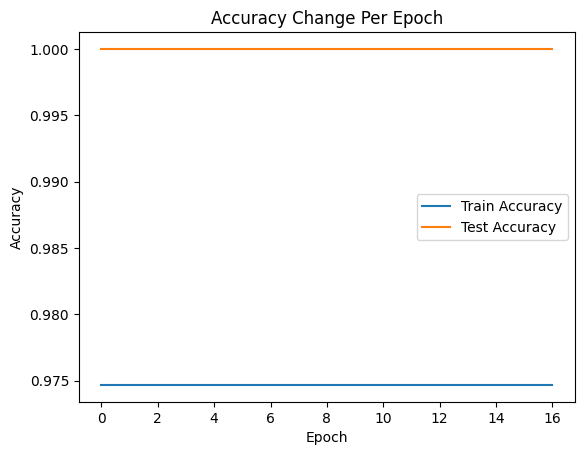

In [23]:
#@title Train Network
flatten = False #@param {type:"boolean"}
learning_rate = 0.08 #@param {type:"number"}
batch_size =100 #@param {type:"number"}
iters_num = 10000 #@param {type:"number"}

import pickle
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

def train(x_train, t_train, x_test, t_test, initParams=None):
    # Because the output is between 0-9 so we set output_size to 10
    network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10, initParams=initParams)
    optimizer = SGD(learning_rate)

    train_size = x_train.shape[0] # 60000
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)

    for i in range(iters_num):
        batch_mask = np.random.choice(train_size, batch_size) # Select a batch_size between 0 - train_size
        
        # Randomly select a part of data
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]


        if not initParams:
            grads = network.gradient(x_batch, t_batch)
            optimizer.update(network.params, grads)

        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)


        # Only calcuate accuracy every epoch. All data passed in.
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            # print(train_acc, test_acc)

    epochs = range(len(train_acc_list))
    plt.plot(epochs, train_acc_list, label='Train Accuracy')
    plt.plot(epochs, test_acc_list, label='Test Accuracy')
    plt.title('Accuracy Change Per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    return network.params


dataset_dir = "/content"
save_file = dataset_dir + "/params.pkl"

if not os.path.exists(save_file):
    params = train(x_train, t_train, x_test, t_test)
    with open(save_file, 'wb') as f:
        pickle.dump(params, f, -1)
else:
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    
    batch_mask = np.random.choice(10000, 5) 
    print(batch_mask)
    test_data = np.array(x_test[batch_mask])
    expected_answer = np.array(t_test[batch_mask])

    train(x_train, t_train, test_data, expected_answer, dataset)


In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Reference

1. Saito Yasuhiro. Deep Learning from Scratch[M]. Japan: O'Reilly Japan, 2016.

2. 管他叫大靖. (2021年05月24日). Softmax Loss 的推导及改进. 知乎专栏. (https://zhuanlan.zhihu.com/p/374018199).